In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("../sigRF/data/monkey_pox.csv")

In [3]:
print(df.columns)

Index(['Patient_ID', 'Systemic Illness', 'Rectal Pain', 'Sore Throat',
       'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils',
       'HIV Infection', 'Sexually Transmitted Infection', 'MonkeyPox'],
      dtype='object')


In [4]:
df.drop("Patient_ID", axis = 1, inplace = True)

In [5]:
df.dropna(inplace = True)

In [6]:
le_SystemicIllness = LabelEncoder()
le_RectalPain = LabelEncoder()
le_SoreThroat = LabelEncoder()
le_PenileOedema = LabelEncoder()
le_OralLesions = LabelEncoder()
le_SolitaryLesion = LabelEncoder()
le_SwollenTonsil = LabelEncoder()
le_HIVInfection = LabelEncoder()
le_SexuallyTransmittedInfection = LabelEncoder()
le_MonkeyPox = LabelEncoder()



In [7]:
df["HIV Infection"] = le_HIVInfection.fit_transform(df["HIV Infection"])
df["Systemic Illness"] = le_SystemicIllness.fit_transform(df["Systemic Illness"])
df["MonkeyPox"] = le_MonkeyPox.fit_transform(df["MonkeyPox"])
df["Oral Lesions"] = le_OralLesions.fit_transform(df["Oral Lesions"])
df["Penile Oedema"] = le_PenileOedema.fit_transform(df["Penile Oedema"])
df["Solitary Lesion"] = le_SolitaryLesion.fit_transform(df["Solitary Lesion"])
df["Rectal Pain"] = le_RectalPain.fit_transform(df["Rectal Pain"])
df["Sexually Transmitted Infection"] = le_SexuallyTransmittedInfection.fit_transform(df["Sexually Transmitted Infection"])
df["Swollen Tonsils"] = le_SwollenTonsil.fit_transform(df["Swollen Tonsils"])
df["Sore Throat"] = le_SoreThroat.fit_transform(df["Sore Throat"])

In [8]:
X = df.drop("MonkeyPox", axis = 1)
y = df[["MonkeyPox"]]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =42)

In [ ]:
rf = RandomForestClassifier(n_estimators=30, random_state=42)
rf.fit(X_train, y_train)

In [11]:
y_pred = rf.predict(X_test)

In [12]:
from sklearn.metrics import f1_score, confusion_matrix
print("F1 Score: ",f1_score(y_pred, y_test))


F1 Score:  0.7906866800614585


## Calculating feature usage in decision paths and feature importance based on impurity reduction

In [13]:
from sigRF.decision_path import get_decision_paths, extract_rule_paths, extract_tree_paths

In [14]:
decision_paths = get_decision_paths(rf, X_train)

In [15]:
# decision_paths

In [16]:
feature_names = X.columns

In [17]:
all_rule_texts = []
for est in rf.estimators_:
    rules = extract_rule_paths(est, feature_names)
    all_rule_texts.extend(rules)
all_rule_texts[0]

'(Systemic Illness <= 0.50) AND (Sexually Transmitted Infection <= 0.50) AND (Rectal Pain <= 0.50) AND (HIV Infection <= 0.50) AND (Swollen Tonsils <= 0.50) AND (Solitary Lesion <= 0.50) AND (Sore Throat <= 0.50) AND (Penile Oedema <= 0.50) AND (Oral Lesions <= 0.50)'

In [18]:
from sigRF.encode_decode import encode_rule_structure
# Encode the rules
encoded_rules = encode_rule_structure(all_rule_texts, columns= X.columns)

# Show some of the encoded rules
for i in range(5):
    print(encoded_rules[i])


FEAT_8_LTE_0.50) AND FEAT_4_LTE_0.50) AND FEAT_3_LTE_0.50) AND FEAT_0_LTE_0.50) AND FEAT_7_LTE_0.50) AND FEAT_5_LTE_0.50) AND FEAT_6_LTE_0.50) AND FEAT_2_LTE_0.50) AND FEAT_1_LTE_0.50)
FEAT_8_LTE_0.50) AND FEAT_4_LTE_0.50) AND FEAT_3_LTE_0.50) AND FEAT_0_LTE_0.50) AND FEAT_7_LTE_0.50) AND FEAT_5_LTE_0.50) AND FEAT_6_LTE_0.50) AND FEAT_2_LTE_0.50) AND FEAT_1_GT_0.50)
FEAT_8_LTE_0.50) AND FEAT_4_LTE_0.50) AND FEAT_3_LTE_0.50) AND FEAT_0_LTE_0.50) AND FEAT_7_LTE_0.50) AND FEAT_5_LTE_0.50) AND FEAT_6_LTE_0.50) AND FEAT_2_GT_0.50) AND FEAT_1_LTE_0.50)
FEAT_8_LTE_0.50) AND FEAT_4_LTE_0.50) AND FEAT_3_LTE_0.50) AND FEAT_0_LTE_0.50) AND FEAT_7_LTE_0.50) AND FEAT_5_LTE_0.50) AND FEAT_6_LTE_0.50) AND FEAT_2_GT_0.50) AND FEAT_1_GT_0.50)
FEAT_8_LTE_0.50) AND FEAT_4_LTE_0.50) AND FEAT_3_LTE_0.50) AND FEAT_0_LTE_0.50) AND FEAT_7_LTE_0.50) AND FEAT_5_LTE_0.50) AND FEAT_6_GT_0.50) AND FEAT_1_LTE_0.50) AND FEAT_2_LTE_0.50)


In [19]:
# Function to decode an encoded rule
from sigRF.encode_decode import decode_rule_structure

# Example of decoding the encoded rules
encoded_rule_example = [encoded_rules[0]]  # Example encoded rule
decoded_rule = decode_rule_structure(encoded_rule_example, columns = X.columns)

# Show the decoded rule
print(decoded_rule[0])  # Example output: (mean radius <= 15.5) AND (mean smoothness > 20.1)


(Systemic Illness <= 0.50)) AND (Sexually Transmitted Infection <= 0.50)) AND (Rectal Pain <= 0.50)) AND (HIV Infection <= 0.50)) AND (Swollen Tonsils <= 0.50)) AND (Solitary Lesion <= 0.50)) AND (Sore Throat <= 0.50)) AND (Penile Oedema <= 0.50)) AND (Oral Lesions <= 0.50))


In [20]:
# from sigRF.SIG import create_sig
# ##User can directly create optimized SIG
# sig = create_sig(columns=X.columns, encoded_rules=encoded_rules)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/Gomes-FerreiraA-Dev/workspace/sigRDF/.venv/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/p0/0hqzynfj21zb2ybr_l6r63tr0000gp/T/ae0d387908ad41a4abf23e048bb8b354-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/p0/0hqzynfj21zb2ybr_l6r63tr0000gp/T/ae0d387908ad41a4abf23e048bb8b354-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 6 COLUMNS
At line 299 RHS
At line 301 BOUNDS
At line 375 ENDATA
Problem MODEL has 1 rows, 73 columns and 73 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 46672 - 0.00 seconds
Cgl0004I processed model has 1 rows, 73 columns (73 integer (73 of which binary)) and 73 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution fou

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

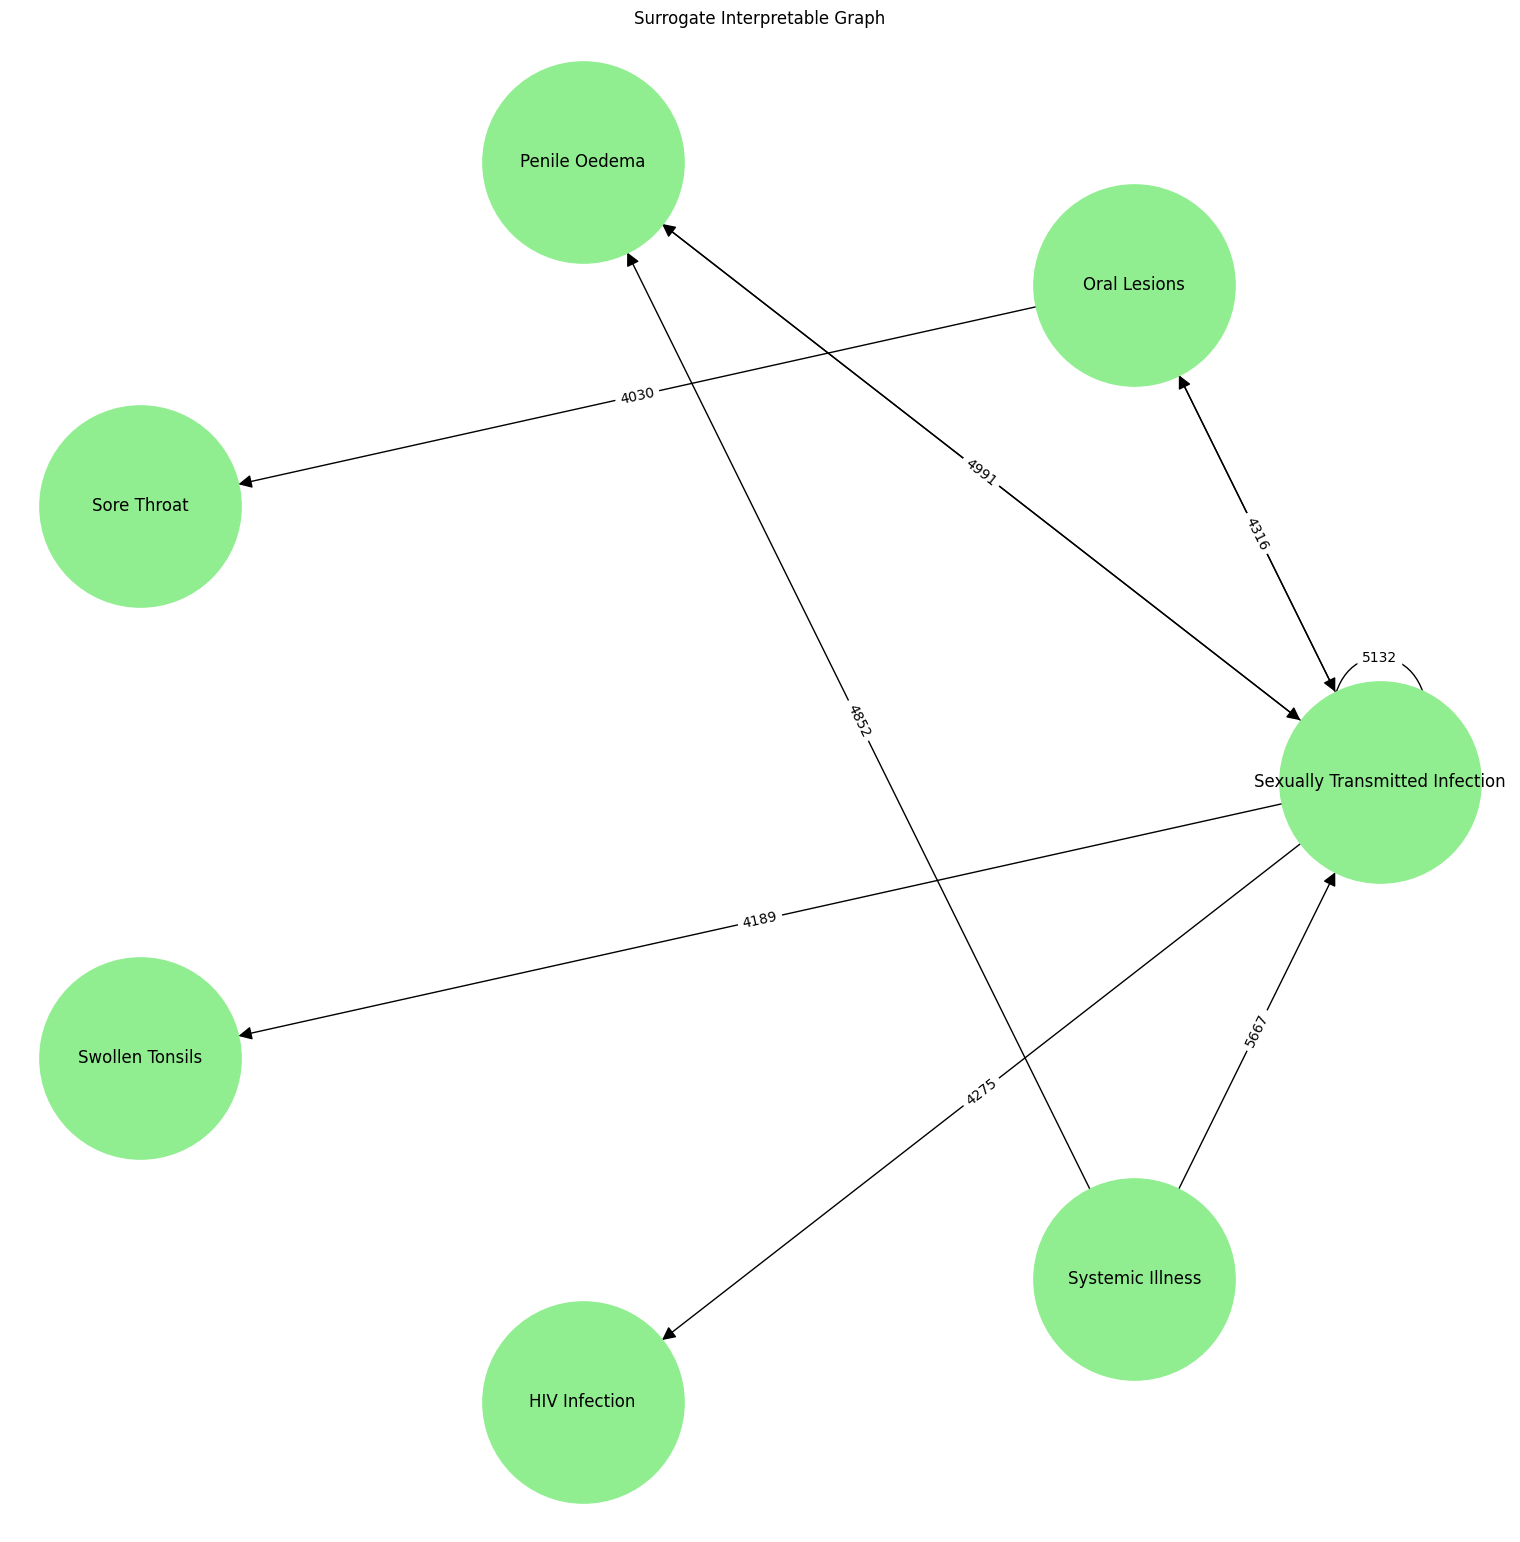

In [21]:
from sigRF.SIG import create_sig_optimized
sig_optimized  = create_sig_optimized(columns=X.columns, encoded_rules=encoded_rules, max_edges=10)

In [22]:
sig_optimized.remove_edge('Sexually Transmitted Infection', 'Sexually Transmitted Infection')

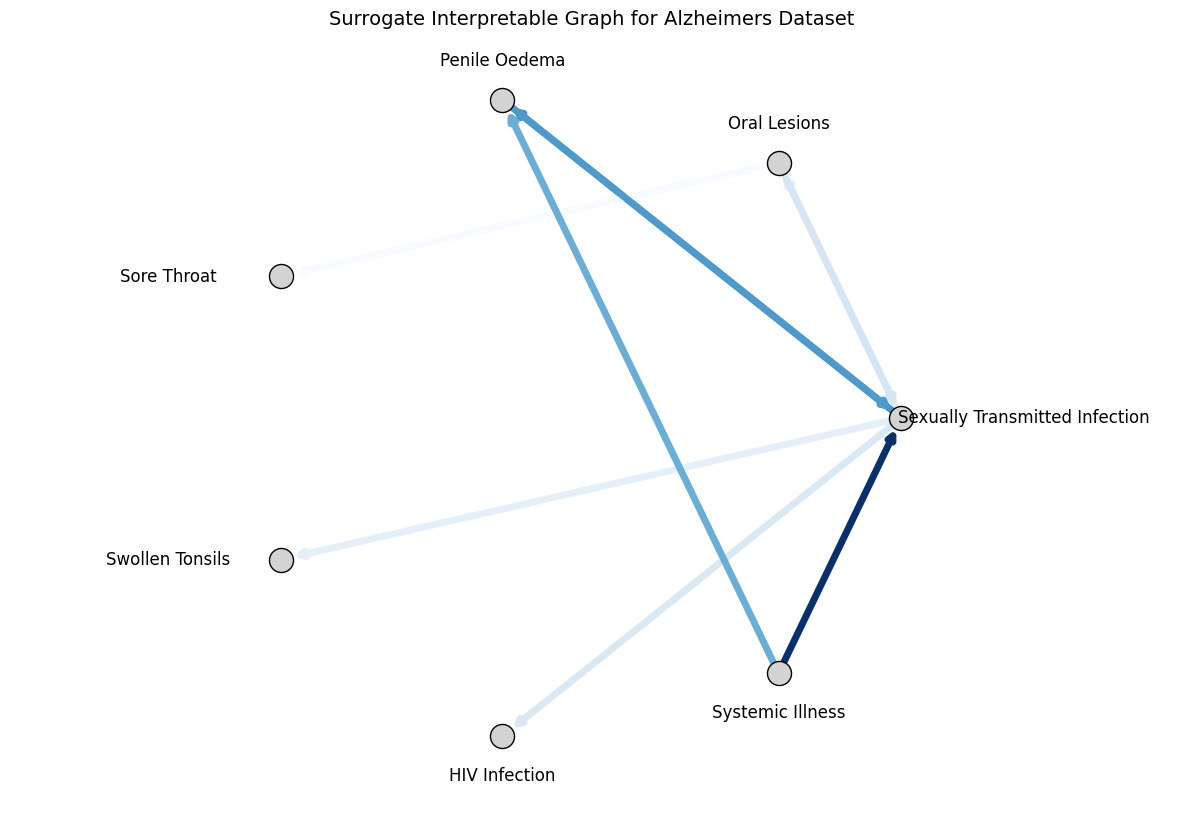

In [23]:
from sigRF.SIG import beautify
beautify(sig_optimized)

## Interpretation supporting domain validation
### Evaluation of Feature Chains for Monkeypox Diagnosis

Below is an expert analysis of how the provided feature chains relate to monkeypox, based on the search results:

---

### 1. Swollen Tonsils → STI → Oral Lesions

- **Support:** Monkeypox can present with oropharyngeal symptoms, including swollen tonsils and oral lesions, especially in patients with a history of receptive oral sex, which is a recognized STI risk factor in recent outbreaks[5]. Tonsillar and oral lesions are documented, often in the context of sexual transmission[5].
- **Validation:** This chain is well-supported; monkeypox may present with tonsillar swelling and oral lesions, particularly in those with STI risk factors[5].

---

### 2. Swollen Tonsils → STI → Penile Oedema

- **Support:** While swollen tonsils and penile oedema are both recognized manifestations of monkeypox, direct co-occurrence is less documented. Both can occur in patients with STI risk factors, but there is no strong evidence that swollen tonsils specifically predict penile oedema[3][5].
- **Validation:** Possible but less directly supported; both features can be present in monkeypox, especially in high-risk sexual networks, but their direct linkage is not established.

---

### 3. Swollen Tonsils → STI → Solitary Lesion

- **Support:** Solitary lesions (including in the mouth or genital area) are increasingly recognized in monkeypox cases, sometimes in patients with oropharyngeal symptoms and STI risk factors[3][5]. However, swollen tonsils do not specifically predict solitary lesions.
- **Validation:** This chain is plausible in the context of monkeypox, but the association is indirect.

---

### 4. Swollen Tonsils → STI → Sore Throat

- **Support:** Swollen tonsils and sore throat are both oropharyngeal symptoms seen in monkeypox, especially among those with STI risk factors[1][2][5]. Sore throat is a common presentation, and tonsillar involvement may cause or accompany it[1][2][5].
- **Validation:** Well-supported; both features can co-occur, particularly in the context of sexual transmission.

---

### 5. Systemic Illness → STI → Oral Lesions

- **Support:** Systemic symptoms (fever, malaise) often precede or accompany mucosal/oral lesions in monkeypox, especially in individuals with STI risk factors[3][5][6]. Oral lesions are a recognized manifestation.
- **Validation:** Strongly supported; this is a typical presentation sequence.

---

### 6. Systemic Illness → STI → Penile Oedema

- **Support:** Systemic illness and penile oedema can both occur in monkeypox, particularly in patients with STI risk factors and sexual exposure[3]. Penile oedema is increasingly recognized in recent outbreaks.
- **Validation:** Supported; both features are documented in monkeypox, especially in at-risk populations.

---

### 7. Systemic Illness → STI → Solitary Lesion

- **Support:** Systemic symptoms followed by a solitary lesion (oral, genital, or skin) are well-documented in monkeypox, especially in individuals with STI risk factors[3][5][6].
- **Validation:** Strongly supported.

---

### 8. Systemic Illness → STI → Sore Throat

- **Support:** Systemic illness followed by sore throat is a common presentation in monkeypox, particularly in the context of sexual transmission[1][2][3][5].
- **Validation:** Strongly supported.

---

### 9. Swollen Tonsils → STI → Rectal Pain

- **Support:** Both swollen tonsils and rectal pain are recognized features of monkeypox, especially in those with STI risk factors[3][5][7]. However, there is no direct clinical linkage between swollen tonsils and rectal pain.
- **Validation:** Both can be present in the same patient, but their direct association is not established.

---

### 10. Systemic Illness → STI → Rectal Pain

- **Support:** Systemic symptoms and rectal pain are both well-documented in monkeypox, particularly among those with STI risk factors and sexual exposure[3][7].
- **Validation:** Strongly supported.

---

## Summary Table

| Feature Chain                          | Support for Monkeypox Diagnosis           |
|----------------------------------------|-------------------------------------------|
| Swollen Tonsils → STI → Oral Lesions   | Strongly supported                        |
| Swollen Tonsils → STI → Penile Oedema  | Possible, less directly supported         |
| Swollen Tonsils → STI → Solitary Lesion| Plausible, indirect association           |
| Swollen Tonsils → STI → Sore Throat    | Strongly supported                        |
| Systemic Illness → STI → Oral Lesions  | Strongly supported                        |
| Systemic Illness → STI → Penile Oedema | Supported                                 |
| Systemic Illness → STI → Solitary Lesion| Strongly supported                       |
| Systemic Illness → STI → Sore Throat   | Strongly supported                        |
| Swollen Tonsils → STI → Rectal Pain    | Possible, not directly linked             |
| Systemic Illness → STI → Rectal Pain   | Strongly supported                        |

## Expert Conclusion

Chains involving systemic illness or oropharyngeal symptoms (swollen tonsils, sore throat) progressing to mucosal or genital lesions, especially in the context of STI risk factors, are well-supported diagnostic patterns for monkeypox[3][5][7]. Direct linkage between oropharyngeal and genital/rectal features is less established, but their co-occurrence in at-risk populations is recognized.

Citations:
[1] https://journals.sagepub.com/doi/full/10.1177/01455613241260769
[2] https://pmc.ncbi.nlm.nih.gov/articles/PMC9943563/
[3] https://www.who.int/news-room/fact-sheets/detail/mpox
[4] https://www.cdc.gov/mpox/signs-symptoms/index.html
[5] https://pmc.ncbi.nlm.nih.gov/articles/PMC9534084/
[6] https://en.wikipedia.org/wiki/Mpox
[7] https://www.healthdirect.gov.au/monkeypox
[8] https://www.sciencedirect.com/science/article/abs/pii/S0736467922008101

---